# Анализ модели

In [70]:
import math
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [71]:
import physics as ph
from Sun import SSM18 as s

In [72]:
def load_model(epoch):
#     filename = 'FromCenter/1epoch%.02d.csv' % epoch
    filename = 'Mass/1epoch%.02d.csv' % epoch
    return pd.read_csv(filename)

In [73]:
epoch = 0
df = load_model(epoch)

In [74]:
df

,Unnamed: 0,Mass,Radius,Temperature,Density,Luminosity,Hydrogen,Opacity,Convection,Pressure,Velocity
0,0,0.000000e+00,0.000000e+00,1.333000e+07,94.554471,0.000000e+00,0.732,1.318613,0.0,1.730205e+17,8.561869e-11
1,1,1.989737e+30,1.720827e+09,1.323295e+07,93.267398,2.371017e+31,0.732,1.337635,0.0,1.694228e+17,8.186134e-11
2,2,3.979475e+30,2.170742e+09,1.317560e+07,92.506463,4.667612e+31,0.732,1.348390,0.0,1.673123e+17,7.971258e-11
3,3,5.969212e+30,2.487796e+09,1.312752e+07,91.867973,6.909218e+31,0.732,1.357124,0.0,1.655511e+17,7.795029e-11
4,4,7.958950e+30,2.741213e+09,1.308464e+07,91.297969,9.104061e+31,0.732,1.364692,0.0,1.639865e+17,7.640787e-11
...,...,...,...,...,...,...,...,...,...,...,...
996,996,1.981778e+33,5.478443e+10,8.884676e+05,0.065450,2.461129e+33,0.732,6.506261,1.0,7.982444e+12,2.801593e-22
997,997,1.983768e+33,5.565851e+10,7.779882e+05,0.053620,2.461129e+33,0.732,5.330260,1.0,5.726433e+12,5.617357e-23
998,998,1.985758e+33,5.672587e+10,6.475668e+05,0.040707,2.461129e+33,0.732,4.046600,1.0,3.618575e+12,6.097868e-24
999,999,1.987748e+33,5.818398e+10,4.769614e+05,0.025719,2.461129e+33,0.732,2.556699,1.0,1.683936e+12,1.506867e-25


In [75]:
x = df['Hydrogen'].values
r = df['Radius'].values
m = df['Mass'].values
t = df['Temperature'].values
d = df['Density'].values
l = df['Luminosity'].values
p = df['Pressure'].values
k = df['Opacity'].values
c = df['Convection'].values

In [76]:
r1 = r/s.R
m1 = m/s.M

In [80]:
r1[-1], m1[-1]

(0.8998296526847884, 0.999868034426001)

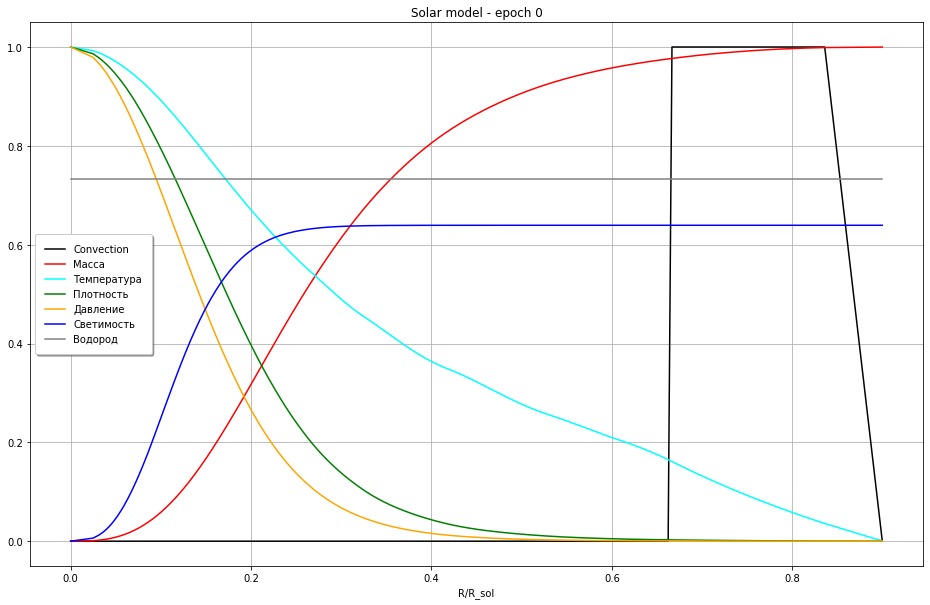

In [77]:
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(r1, c, color='black', label='Convection')
plt.plot(r1, m/s.M, color='red', label='Масса')
plt.plot(r1, t/t[0], color='cyan', label='Температура')
# plt.plot(r1[1:], d1[1:]/d[0], color='green', label='Плотность')
plt.plot(r1, d/d[0], color='green', label='Плотность')
plt.plot(r1, p/p[0], color='orange', label='Давление')
plt.plot(r1, l/s.L, color='blue', label='Светимость')
plt.plot(r1, x, color='gray', label='Водород')
# plt.plot(r1, p1/p1[0], color='black', marker='.', label='Давление')
# plt.xlim(-0.1,0.1)
# plt.ylim(-0.1, 0.1)
plt.xlabel('R/R_sol')
plt.ylabel('')
plt.title('Solar model - epoch %d' % epoch)
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

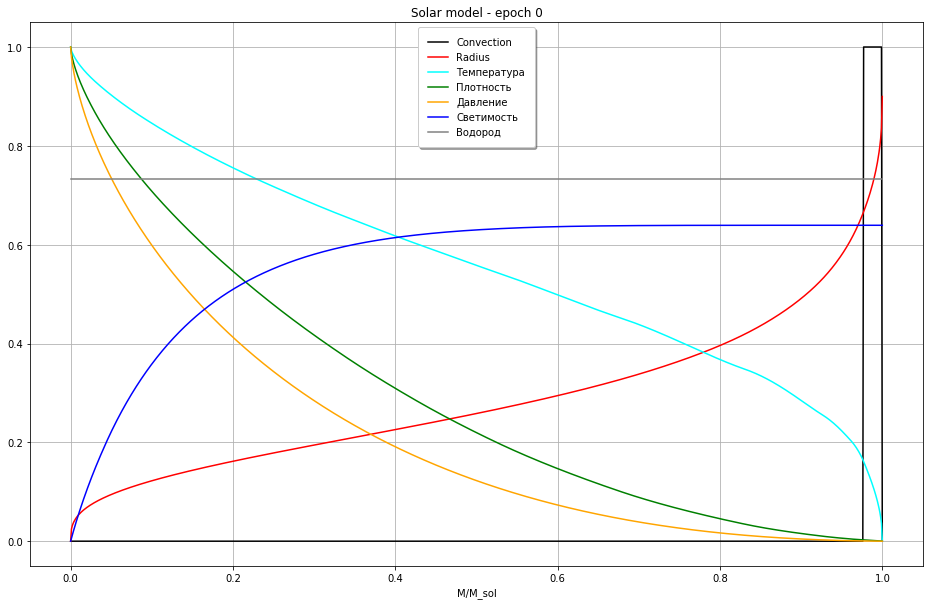

In [78]:
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(m1, c, color='black', label='Convection')
plt.plot(m1, r1, color='red', label='Radius')
plt.plot(m1, t/t[0], color='cyan', label='Температура')
plt.plot(m1, d/d[0], color='green', label='Плотность')
plt.plot(m1, p/p[0], color='orange', label='Давление')
plt.plot(m1, l/s.L, color='blue', label='Светимость')
plt.plot(m1, x, color='gray', label='Водород')
# plt.plot(r1, p1/p1[0], color='black', marker='.', label='Давление')
# plt.xlim(-0.1,0.1)
# plt.ylim(-0.1, 0.1)
plt.xlabel('M/M_sol')
plt.ylabel('')
plt.title('Solar model - epoch %d' % epoch)
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

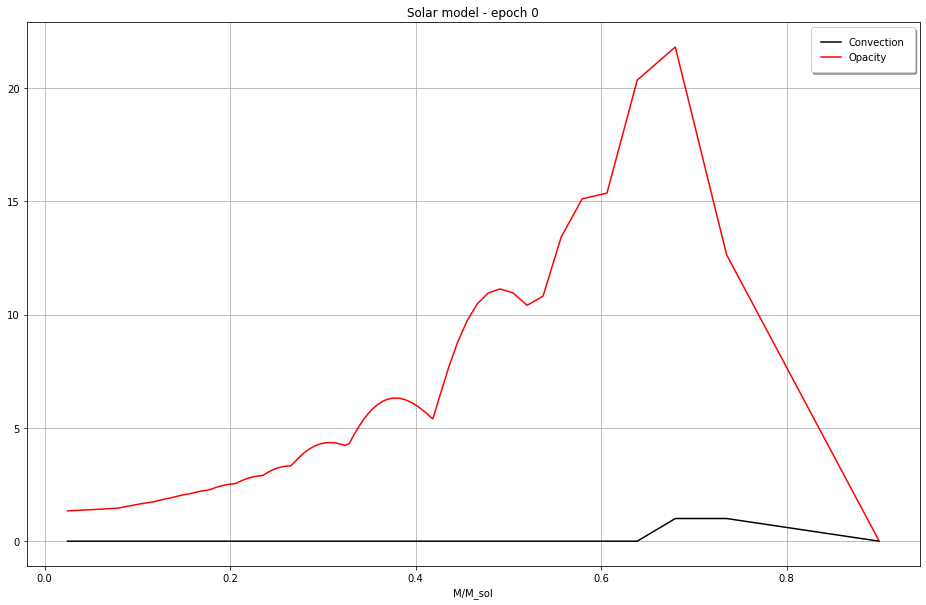

In [42]:
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(r1, c[::10], color='black', label='Convection')
plt.plot(r1, k[::10], color='red', label='Opacity')
# plt.xlim(-0.1,0.1)
# plt.ylim(-0.1, 0.1)
plt.xlabel('M/M_sol')
plt.ylabel('')
plt.title('Solar model - epoch %d' % epoch)
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

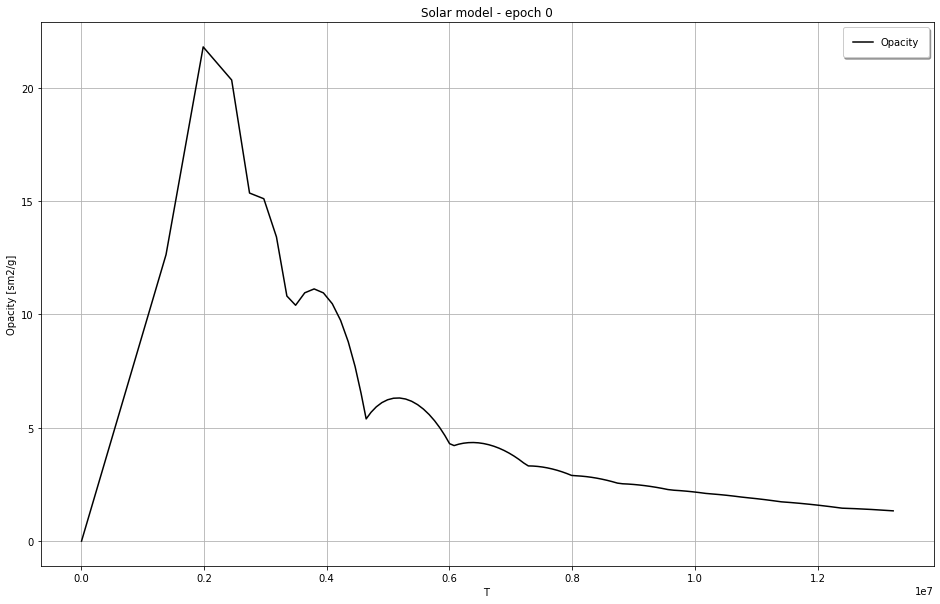

In [43]:
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(t[::10], k[::10], color='black', label='Opacity')
# plt.xlim(-0.1,0.1)
# plt.ylim(-0.1, 0.1)
plt.xlabel('T ')
plt.ylabel('Opacity [sm2/g]')
plt.title('Solar model - epoch %d' % epoch)
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

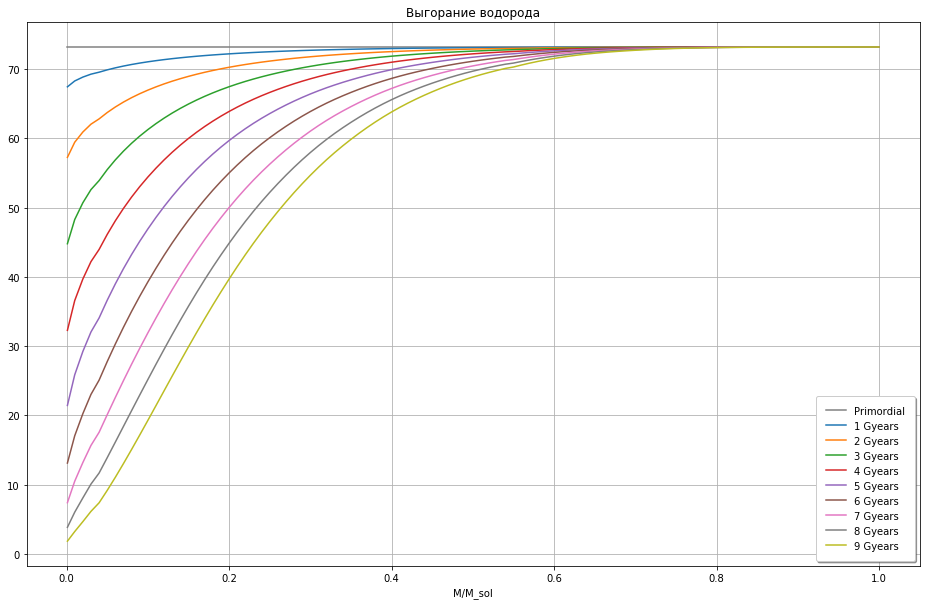

In [58]:
h = 100.*x[::10]
v = df['Velocity'].values[::10]
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(m1, h, color='gray', label='Primordial')
for ep in range(1,10):
    h = h*np.exp(-1e9*v*ep)
    plt.plot(m1, h, label='%d Gyears' % ep)
plt.xlabel('M/M_sol')
plt.ylabel('')
plt.title('Выгорание водорода')
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);